#### Importando bibliotecas

In [98]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

import os
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import datetime as dt
import numpy as np


#### Carregando dados

In [60]:
path = os.path.join('d:' + os.sep, 'Users', 'mateu', 'Downloads', 'VendasTesouroDireto (1).json')
values = pd.read_json(path)
df_data = pd.DataFrame(values)
df_data['Tipo_Titulo'] = df_data['Tipo_Titulo'].astype('str') 
df_data['PU'] = df_data['PU'].str.replace(',', '.')
df_data['Quantidade'] = df_data['Quantidade'].str.replace(',', '.')
df_data['Valor'] = df_data['Valor'].str.replace(',', '.')
df_data['PU'] = pd.to_numeric(df_data['PU'], errors='coerce')
df_data['Quantidade'] = pd.to_numeric(df_data['Quantidade'], errors='coerce')
df_data['Valor'] = pd.to_numeric(df_data['Valor'], errors='coerce')
df_data['Vencimento_do_Titulo'] = pd.to_datetime(df_data['Vencimento_do_Titulo'])
df_data['Data_Venda'] = pd.to_datetime(df_data['Data_Venda'])

df_data = df_data.sample(frac=1)

df_data

Tipo_Titulo Vencimento_do_Titulo Data_Venda  \
45630  Tesouro IPCA+ com Juros Semestrais           2015-05-15 2005-07-22   
18473  Tesouro IPCA+ com Juros Semestrais           2020-08-15 2012-06-06   
44566  Tesouro IGPM+ com Juros Semestrais           2031-01-01 2005-11-14   
50677  Tesouro IPCA+ com Juros Semestrais           2008-08-15 2006-03-13   
40039  Tesouro IGPM+ com Juros Semestrais           2005-01-12 2003-07-30   
...                                   ...                  ...        ...   
60390  Tesouro IPCA+ com Juros Semestrais           2013-05-15 2008-05-30   
31286                       Tesouro IPCA+           2024-08-15 2017-02-10   
32                          Tesouro Selic           2014-07-03 2009-02-01   
42958  Tesouro IPCA+ com Juros Semestrais           2024-08-15 2004-02-17   
762    Tesouro IPCA+ com Juros Semestrais           2015-05-15 2009-07-01   

                PU  Quantidade       Valor  
45630  1271.161111        3.60     4576.17  
18473  2426.613323      794.10  1926973.63  
44566  2510.630000        2.00     5021.26  
50677  1473.200000       45.20    66588.64  
40039  1394.150000       30.40    42382.16  
...            ...         ...         ...  
60390  1603.277972       85.80   137561.24  
31286  2209.077844     2522.46  5572310.49  
32     3726.728894       39.80   148323.80  
42958  1058.709860       86.20    91260.78  
762    1638.455791      452.40   741237.39  

[66169 rows x 6 columns]

#### Visualizando dados

In [3]:
#plt.scatter(df_data['PU'],df_data['Valor'])

#plt.xlabel('PU')
#plt.ylabel('Valor')

#plt.show()

In [4]:
df_data.columns

Index(['Tipo_Titulo', 'Vencimento_do_Titulo', 'Data_Venda', 'PU', 'Quantidade',
       'Valor'],
      dtype='object')

In [5]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66169 entries, 63530 to 41657
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Tipo_Titulo           66169 non-null  object        
 1   Vencimento_do_Titulo  66169 non-null  datetime64[ns]
 2   Data_Venda            66169 non-null  datetime64[ns]
 3   PU                    66169 non-null  float64       
 4   Quantidade            66169 non-null  float64       
 5   Valor                 66169 non-null  float64       
dtypes: datetime64[ns](2), float64(3), object(1)
memory usage: 3.5+ MB


In [6]:
df_data['Data_Venda'].value_counts()

2008-03-27    28
2008-02-04    28
2008-03-26    28
2008-03-24    28
2008-03-04    28
              ..
2002-06-27     1
2003-08-02     1
2002-04-01     1
2016-02-09     1
2002-03-26     1
Name: Data_Venda, Length: 4842, dtype: int64

In [7]:
df_data['Vencimento_do_Titulo'] = pd.to_datetime(df_data['Vencimento_do_Titulo'], errors='coerce')
df_data['Vencimento_do_Titulo'].groupby(df_data['Vencimento_do_Titulo'].dt.year).count()

Vencimento_do_Titulo
2002     214
2003     289
2004     977
2005    1907
2006    2014
2007    2073
2008    3428
2009    3026
2010    3155
2011    2428
2012    2791
2013    1467
2014    1666
2015    4738
2016     490
2017    4410
2018     484
2019    1257
2020    1900
2021    2401
2022     254
2023    1627
2024    5723
2025    1470
2026    1711
2027     616
2029     481
2030     360
2031    1349
2035    6021
2040     359
2045    2894
2050    1828
2055     361
Name: Vencimento_do_Titulo, dtype: int64

In [8]:
df_data[df_data['Vencimento_do_Titulo'].dt.year == 2002].value_counts()
#df_data.loc[df_data['Vencimento_do_Titulo'].dt.year == 2002]


Tipo_Titulo        Vencimento_do_Titulo  Data_Venda  PU          Quantidade  Valor    
Tesouro Prefixado  2002-02-10            2002-01-07  952.324951  206.0       196178.93    1
                   2002-05-06            2002-01-14  934.752631  7.6         7104.11      1
                                         2002-01-16  935.372115  41.6        38911.47     1
                                         2002-01-17  936.242653  49.0        45875.88     1
                                         2002-01-18  937.777226  119.0       111595.48    1
                                                                                         ..
                   2002-04-12            2002-04-19  896.277336  286.8       257052.33    1
                                         2002-04-22  896.925476  73.4        65834.32     1
                                         2002-04-23  897.182857  56.0        50242.23     1
                                         2002-04-24  896.921527  14.4        12915.66

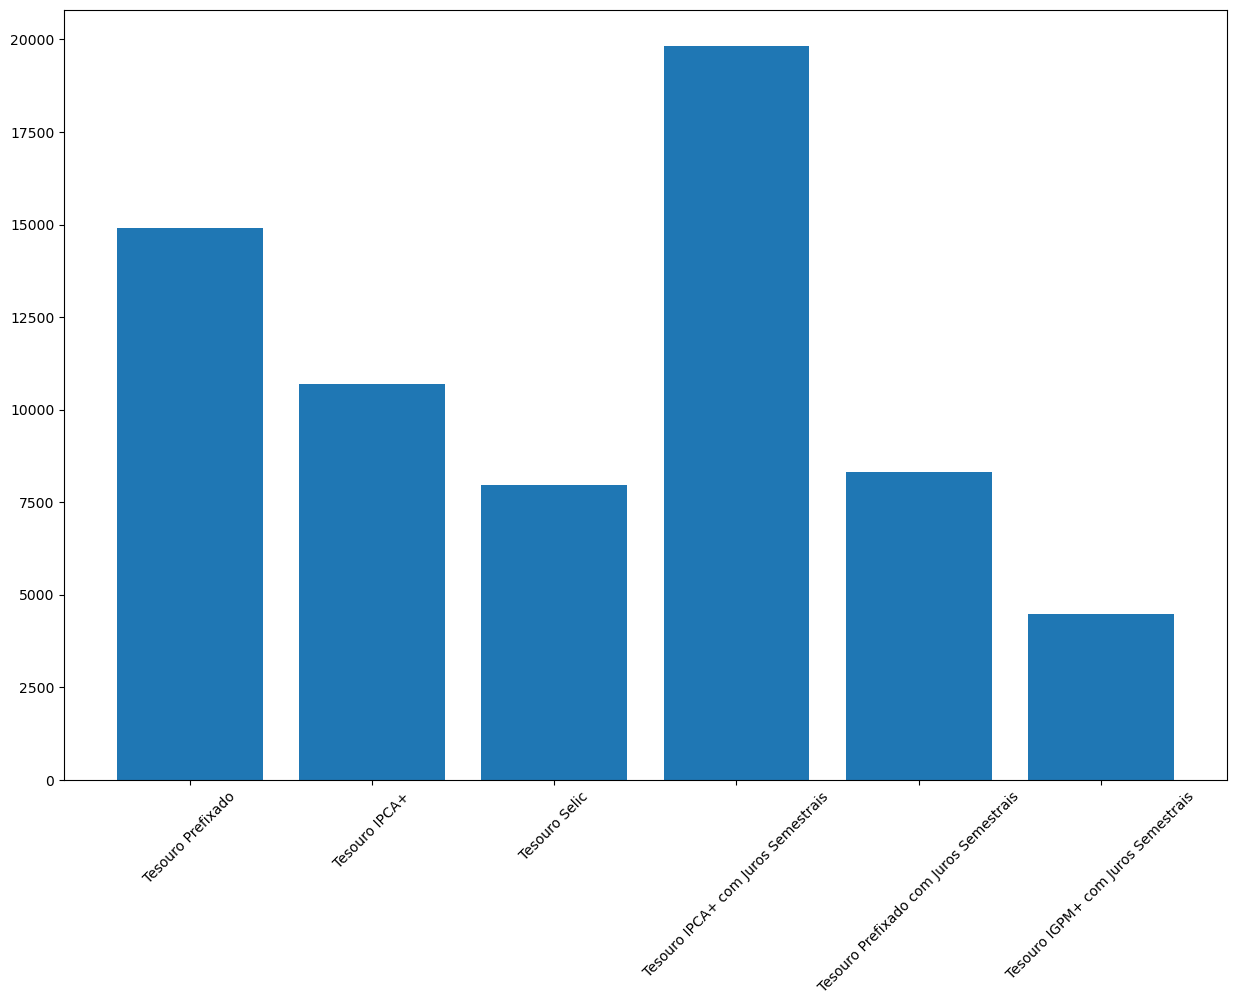

In [57]:
acc = {}
for x in df_data['Tipo_Titulo']:
    if x in acc:
        acc[x] = acc[x] + 1
    else:
        acc[x] = 1
x = acc.keys()
y = acc.values()
fig=plt.figure(figsize=(15,10))
plt.bar(range(len(acc)), list(acc.values()), align='center')
plt.xticks(range(len(acc)), list(acc.keys()))
plt.xticks(rotation=45)
plt.show()

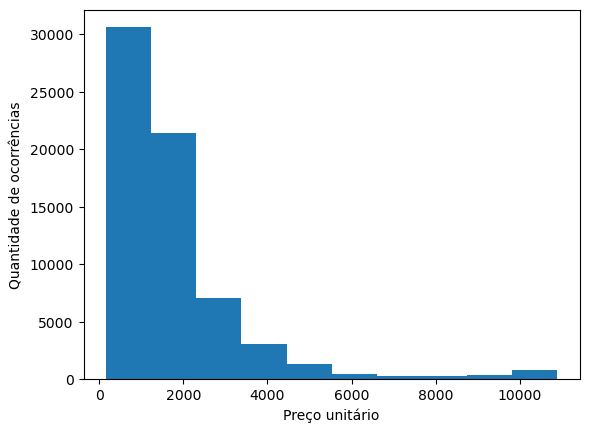

In [79]:
acd = {}
for x in df_data['PU']:
    if x in acd:
        acd[x] = acd[x] + 1
    else:
        acd[x] = 1
        
plt.hist(acd)
plt.xlabel('Preço unitário')
plt.ylabel('Quantidade de ocorrências')
plt.show()

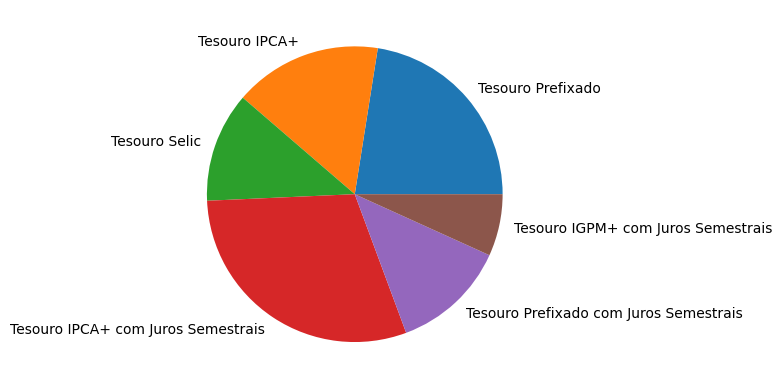

In [97]:
plt.pie([x/len(df_data.value_counts()) for x in acc.values()],labels=acc.keys())
plt.show()

      Data_Venda
45630 2005-07-22
18473 2012-06-06
44566 2005-11-14
50677 2006-03-13
40039 2003-07-30


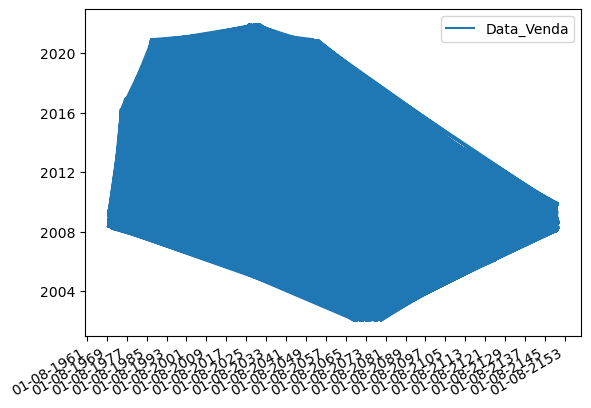

In [108]:

df = pd.DataFrame(data=df_data, columns=['Data_Venda'])
print (df.head())

ax = df.plot()
# set monthly locator
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=96))
# set formatter
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.gcf().autofmt_xdate()

plt.show()

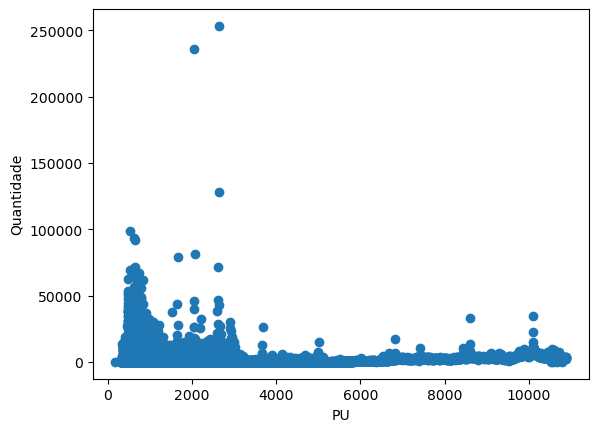

In [21]:
#df_datapu = [x for i, x  in enumerate(df_data['PU']) if i < 1000]
#df_dataqtd = [x for i, x  in enumerate(df_data['Quantidade']) if i < 1000]

#plt.scatter(df_datapu, df_dataqtd)
plt.scatter(df_data['PU'], df_data['Quantidade'])
plt.xlabel('PU')
plt.ylabel('Quantidade')
# pode-se observar que quanto menor o preço unitário, maior é a quantidade vendida
plt.show()

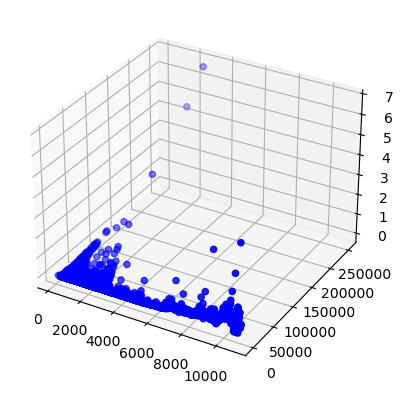

In [61]:

if 'Valor' in df_data.columns:
    ax = plt.axes(projection='3d')
    ax.scatter3D(df_data['PU'].array,df_data['Quantidade'].array,df_data['Valor'].array, color='blue');
    plt.show()

In [11]:
pu = df_data['Quantidade']
# será se deve ser essas colunas mesmo?
df_features = df_data.drop(columns=['Tipo_Titulo', 'Vencimento_do_Titulo', 'Data_Venda', 'Quantidade'])

df_features

PU        Valor
63530   1712.014242    623857.98
33884   1902.576138   4123833.77
52628    343.232196     18122.65
16019   4911.450000   1464594.39
38516    955.329946    249150.04
...             ...          ...
21190  10745.724610  25305536.70
14080   2507.728771  15638948.93
29321   3595.722442   5004346.70
50975   1277.100000     14048.10
41657   1040.610000      1040.61

[66169 rows x 2 columns]

#### Treinando e validando nosso modelo

In [12]:
def getModel():
    #return LinearRegression() # resultados menos efetivos, porém instantaneos e requer pouco processamento
    return RandomForestRegressor() # resultados melhores mas requer muito processamento

In [13]:
X_train, X_test, y_train, y_test = train_test_split(df_features.values, pu, test_size=0.2)
# pq está tão baixo?

model = getModel().fit(X_train, y_train)

score = model.score(X_test,y_test)

score

0.9971793639964603

#### Validando de maneira mais elaborada

In [14]:
scores = cross_val_score(getModel(), df_features.values, pu, cv = 10)
# pq está tão baixo?
print('R2=',np.mean(scores))

R2= 0.9691560122127771


#### Fazendo previsões

In [15]:
# cada array deve ter um número por coluna, como temos duas colunas então fica 0.9,0.9 por item por exemplo
model.predict([[0.9, 0.9], [0.1, 0.1]])

array([0.794, 0.794])

#### VERIFICANDO CORRELAÇÃO

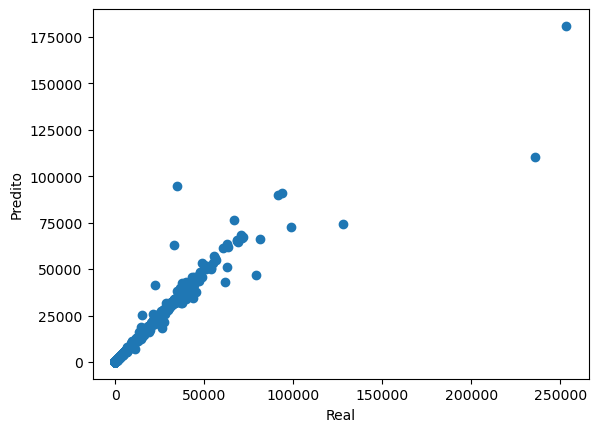

In [18]:
pû = cross_val_predict(getModel(), df_features.values, pu, cv = 20)
plt.scatter(pu, pû)

plt.xlabel('Real')
plt.ylabel('Predito')

plt.show()

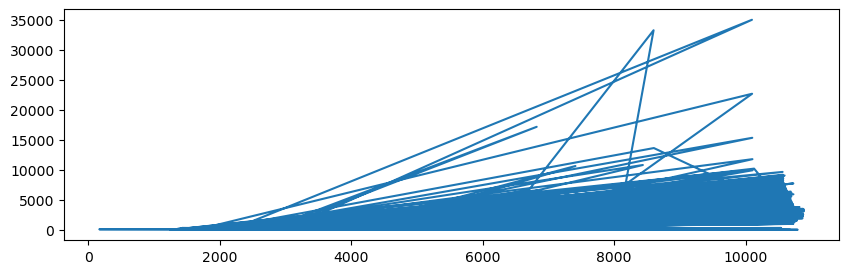

<Figure size 1000x300 with 0 Axes>

<Figure size 1000x300 with 0 Axes>

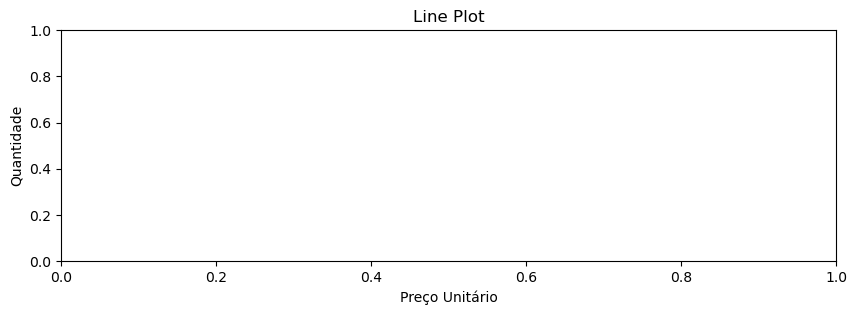

63530    False
33884    False
52628    False
16019     True
38516    False
         ...  
21190     True
14080    False
29321    False
50975    False
41657    False
Name: Tipo_Titulo, Length: 66169, dtype: bool

In [31]:
fig=plt.figure(figsize=(10,3))
isSelic = df_data['Tipo_Titulo'] == "Tesouro Selic"
#if df_data.isSelic == true:
 #   plt.plot(df_data['PU'][isSelic],df_data['Quantidade'][isSelic])

plt.title('Line Plot')
plt.xlabel('Preço Unitário')
plt.ylabel('Quantidade')
#df_data['PU'][isSelic].value_counts()
plt.show()

isSelic